## Começando os Trabalhos

### Importando as bibliotecas necessárias

In [25]:
import numpy as np
import pandas as pd


# Import charting library
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.set(style='darkgrid')
%matplotlib inline

#### Lendo os `Dados`

In [28]:
# Lendo os dados
df = pd.read_csv("titanic-data-6.csv")

### `Head` & `Tail`, dados brutos.

In [30]:
def head_and_tail(data, value):
    """
    Parameters
    ----------
    
        data: str
            Nome do dataFrame.
        value: int
            Quantidade de linhas a ser exibida.

    Proposito
    ---------
    
        Visualizar as primeiras e últimas linhas do DataFrame, de acordo com a quantidade descrita em value.
        
    """
    print('HEAD')
    display(data.head(value))
    print('TAIL')
    display(data.tail(value))
        
head_and_tail(df, 3)

HEAD


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


TAIL


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


- Mostrar os dados brutos, para conhecer as colunas e os dados e ter uma visão geral. 

#### Obtendo os `Tipos` das colunas

In [31]:
type_columns = dict(df.dtypes)
print(type_columns)

{'PassengerId': dtype('int64'), 'Survived': dtype('int64'), 'Pclass': dtype('int64'), 'Name': dtype('O'), 'Sex': dtype('O'), 'Age': dtype('float64'), 'SibSp': dtype('int64'), 'Parch': dtype('int64'), 'Ticket': dtype('O'), 'Fare': dtype('float64'), 'Cabin': dtype('O'), 'Embarked': dtype('O')}


#                ---------------------------- `Limpeza de Dados` ----------------------------

#### Apagar as colunas `Cabin` e `SibSp`.
- `Cabin`: Não faz muito sentido e compromete os demais dados, por existir muitos `NaN`.
- `Ticket`: Não é uma coluna que agrega valor.
- `PassengerId`: Não precisamos.

In [32]:
df.drop(columns=['PassengerId', 'Ticket', 'Cabin'], inplace=True);

- Apagar os nulos da coluna `Embarked`.

In [33]:
df.dropna(subset=['Embarked'], how='all', inplace = True)

#### Quantidade de NaN's
- Confirma se existe algum `NaN` e mostra o `nome das colunas`.

In [34]:
count_num = dict(df.isna().sum())
print(count_num)

{'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Fare': 0, 'Embarked': 0}


#### Preencher os `NaN` de `Age` com a *Média*

- Preenche `Age` com a média onde `Sex == Female` e  `Age` onde `Sex == Male`

In [35]:
df.loc[(df['Sex'] == 'female') & (df['Age'].isna()), 'Age'] = df.query('Sex == "female"')['Age'].mean().round(2)
df.loc[(df['Sex'] == 'male') & (df['Age'].isna()), 'Age'] = df.query('Sex == "male"')['Age'].mean().round(2)

- Verificando a quantidade de Linhas e Colunas

In [36]:
df.shape

(889, 9)

- Confirma se existe algum NaN de quebra mostra o nome das colunas.

In [37]:
count_num = dict(df.isna().sum())
print(count_num)

{'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 0, 'SibSp': 0, 'Parch': 0, 'Fare': 0, 'Embarked': 0}


- Verificando se exite dados duplicados.

In [38]:
df.duplicated().sum()

0

### `Head` & `Tail`, após tratamento dos dados.

In [39]:
head_and_tail(df, 3)

HEAD


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


TAIL


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.75,1,2,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,7.75,Q


- Visualizando os dados após a limpeza, para vermos quais colunas restaram no conjunto de dados.

#                ---------------------------- `Iniciando as Perguntas` ----------------------------

## Titanic: Estudo do desastre de maior repercução. 

- Em 10 de Abril de 1912, o RMS Titanic afundou algumas horas depois de colidir com um gigantesco iceberg.
  - Fonte da informação acima [link](https://pt.wikipedia.org/wiki/RMS_Titanic)
- Estudaremos este desastres atraves dos dados.

### Perguntas a serem respondidas:
    1°. Qual Porto embarcou mais pessoas?
    2°. Qual a distribuição de genero por Classe?
    3°. Qual a distribuição de pessoas por Classe?
    4°. Qual quantidade de Sobreviventes e Não Sobreviventes?
    5°. Qual a quantidade de sobreviventes por Genero?
    5°. Qual a distribuição das Idades dos passageiros?
    6°. Qual Classe tinha mais Pais/Filhos?

### 1° Qual `Porto` embarcou mais pessoas?

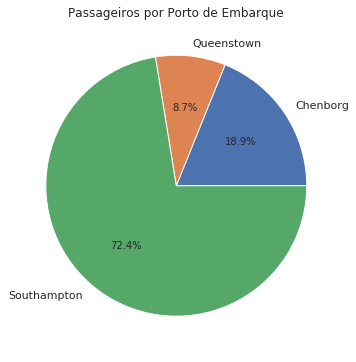

In [40]:
df.groupby(['Embarked'])['Survived'].count().plot.pie(
                                             title='Passageiros por Porto de Embarque',
                                             figsize=(7,6),
                                             labels=('Chenborg', 'Queenstown', 'Southampton'),
                                             autopct='%1.1f%%').set_ylabel('');

- Concluimos que a maioria da classe menos favorecida embarcou em Southampton.
- Logo a maioria do não sobreviventes embarcaram em Southampton.

### 2° Qual a distribuição de genero por `Classe`?

In [48]:
def add_values(x, y, ax, size, title):
    """
    Parameters
    ----------
    
        x: str
            Nome eixo x.
        y: str
            Nome do eixo y.
        ax: str
            Titulo do gráfico.
        size: int
            Tamanho do titulo.
        title: str
            Titulo do gráfico.

    Proposito
    ---------
    
        Automatizar e evitar repetições ao adicionar os valores nos gráficos.
        
    """
    ax.set_title(title, size=15)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

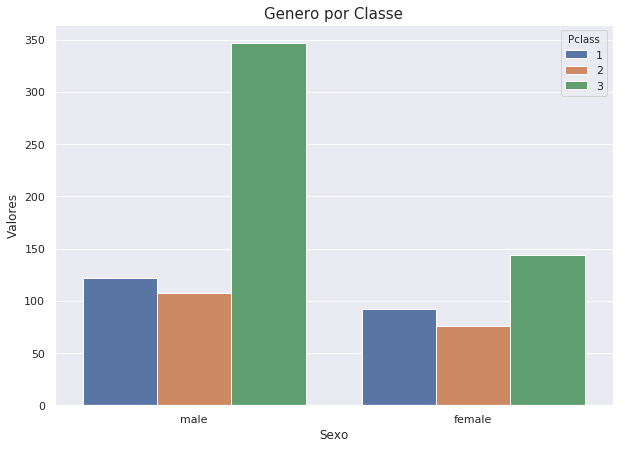

In [53]:
fig, ax = plt.subplots(figsize=(10, 7))

sbn.countplot(x='Sex', data=df, ax=ax, hue='Pclass');

add_values('Sexo', 'Valores', ax, 15, 'Genero por Classe')

- A maioria dos passageiros eram homens e se localizavam na 3° classe. 

### 3° Qual a distribuição de pessoas por `Classe` 

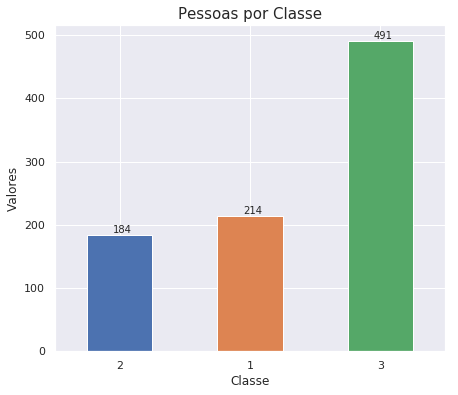

In [54]:
fig, ax = plt.subplots(figsize=(7, 6))

# .sort_values(ascending=True) - Organiza o gráfico em ordem crescente.
df.groupby('Pclass')['Age'].count().sort_values(ascending=True).plot(kind='bar',
                                                 rot=0, 
                                                 ax=ax);

add_values('Classe', 'Valores', ax, 15, 'Pessoas por Classe')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.20, height+3, '%.0f'%(height))

- A 1° classe continha mais passageiros que a 2° classe, nos mostra que a classe mais abastada se fez presente. 

### 4° Qual quantidade de `Sobreviventes` e `Não Sobreviventes` ?

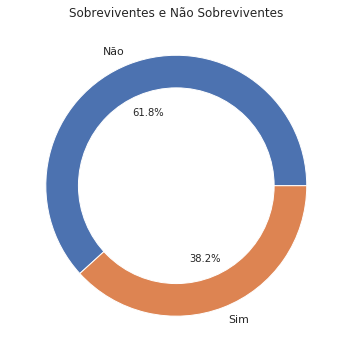

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

df['Survived'].value_counts().plot.pie(
                                     title='Sobreviventes e Não Sobreviventes',
                                     labels=('Não', 'Sim'),
                                     ax=ax,
                                     autopct='%1.1f%%').set_ylabel('')

# Grafico estilo Donut
from matplotlib.patches import Circle
circle = Circle((0,0), 0.75, facecolor='white')

ax.add_artist(circle);

- Observando esse gráfico podemos constatar a magnitude deste desastre. 

### 5° Qual a quantidade de sobreviventes por `Genero`?

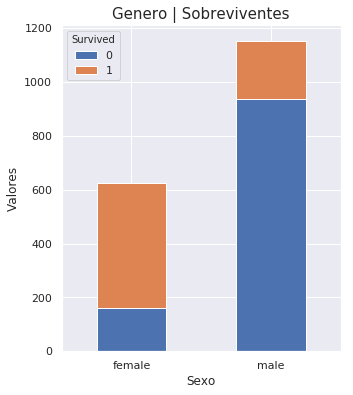

In [55]:
fig, ax = plt.subplots(figsize=(5, 6))

df2 = df[['Survived', 'Sex']].groupby(['Sex', 'Survived']).agg(np.size).unstack()
df2.plot.bar(rot=0, ax=ax, stacked=True);

add_values('Sexo', 'Valores', ax, 15, 'Genero | Sobreviventes')

- Este desastre nos mostra que a proporção de mulheres sobreviventes é muito superior aos homens. 

### 6° Qual a distribuição das `Idades` dos passageiros?

- Ter uma noção geral das idades dos passageiros.

/Users/work/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


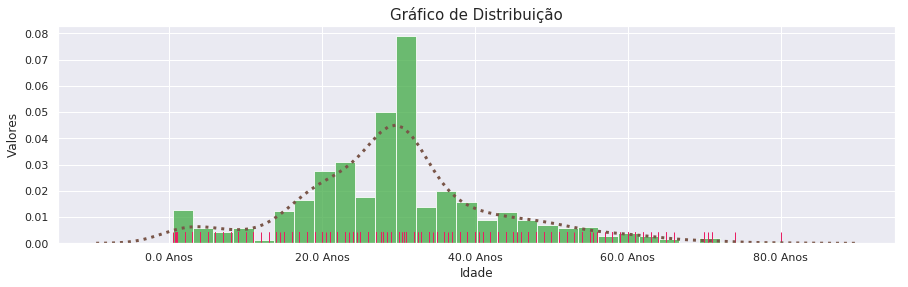

In [56]:
fig, ax = plt.subplots(figsize=(15,4))

sbn.distplot(df.Age,
             ax=ax,
             hist=True,
             rug=True,
             kde=True,
             norm_hist=True,
             kde_kws=dict(color='#795548', linewidth=3, linestyle='dotted'),
             hist_kws=dict(color='#4caf50', alpha=0.8),
             rug_kws=dict(color='#e91e63'));

from matplotlib.ticker import StrMethodFormatter

mft=StrMethodFormatter("{x} Anos")
ax.xaxis.set_major_formatter(mft)
ax.set_title('Gráfico de Distribuição', size=22);

add_values('Idade', 'Valores', ax, 22, 'Gráfico de Distribuição')

- Ter esse panorama das idades nos mostra que os passageiros é composta em sua maioria de adultos. 
  - Continha uma quantidade significativa de crianças.

### 7° Qual `Classe`  tinha mais `Pais/Filhos`?

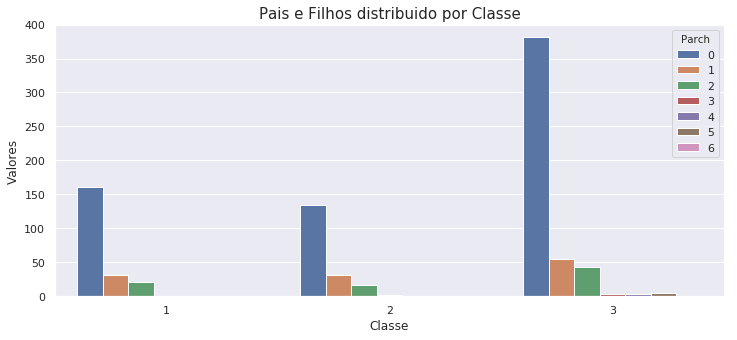

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))

sbn.countplot(data=df, x=df.Pclass, hue=df.Parch);

add_values('Classe', 'Valores', ax, 17, 'Pais e Filhos distribuido por Classe')

- A maioria dos passageiros tinha 1 e 2 filhos. 

#                ---------------------------- `Conclusões` ----------------------------



- A classe de maior população, constituida da classe trabalhadora foi a mais atingida pela tragédia, onde continha varias crianças, isso nos mostra que classe menos favorecida gera mais filhos desde aqueles tempos.

- A maioria dos passageiros constituía entre 20 e 40 anos, mostrando que o foco da viagem para alguns tendo como base o destino, era buscar melhora em alguma terra nova.

- A maioria esmagadora dos passageiros era do sexo masculino. Isso nos mostra a limitação financeira e social imposta pela sociedade daquela época.

*Analisando esses dados podemos constatar a limitação imposta pela cultura da época, pela soberania do mais rico, o cuidado com os meios de evacuação e preocupação em se estabelecer normas e protocolos para salvar as pessoas.*

## Limitações

- A coluna `Cabin`, tinha muitos dados faltantes, os dados poderiam ser mais completos casso estivesse valor nessa coluna.
   - E novas questões poderiam ser levantadas, caso essa coluna contivesse dados.

- Precisei colocar a média das idades em 177 linhas da coluna `Age` isso de certa forma resolve, mas seria melhor se existisse as idades propriamente ditas.